# Roller Coaster

The purpose of this task is to create several data visualizationa that will give you insight into the world of rolloer coasters. 

Roller coasters are thrlling amusement park rides designed to make you squal and scream! They take you high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics. 

Roller coasters ar often split into two main categories based on their construction material: wood or steel. Rankings for the best wood and steel roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in 'Golden_Ticket_Award_Winners_Wood.csv' and 'Golden_Ticket_Award_Winners_Steel.csv', respectively. Load each csv into a DataFrame and inspect it to gain familiraity with the data. 

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt

#####   Load Rankings Data

In [3]:
# load rankings data here:

steel_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
wood_rankings = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')

# print(steel_rankings.head())
# print(wood_rankings.head())

Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization. 

Call your function with 'El Toro' as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function

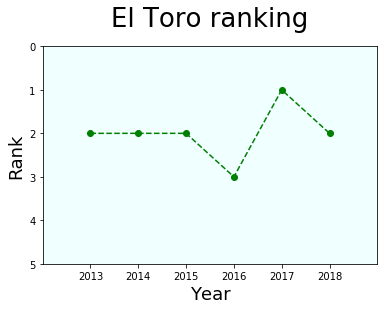

In [4]:
# write function to plot rankings over time for 1 roller coaster here:
# Group by roller coaster
def line_ranking(roller_coaster, data_frame, park_name):
    rankings = data_frame.loc[(data_frame['Name'] == roller_coaster) & (data_frame['Park'] == park_name)]
    ax = plt.subplot()
    ax.set_xticks(range(len(rankings)))
    plt.plot(range(len(rankings)), rankings['Rank'], 'go--')
    ax.set_xticklabels(['2013', '2014', '2015', '2016', '2017', '2018'])
    ax.invert_yaxis()
    ax.set_facecolor('azure')
    plt.axis([-1, 6, 5, 0])
    plt.xlabel('Year', fontsize = 18)
    plt.ylabel('Rank', fontsize = 18)
    plt.title(f"{roller_coaster} ranking", fontsize = 26, pad = 20)
    plt.show()
    
    
    
line_ranking('El Toro', wood_rankings, 'Six Flags Great Adventure')



Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization. 

Call your function with 'El Toro' roller coaster name, 'Boulder Dash' as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with the two additional arguments to alleviate the problem, and retest your function. 

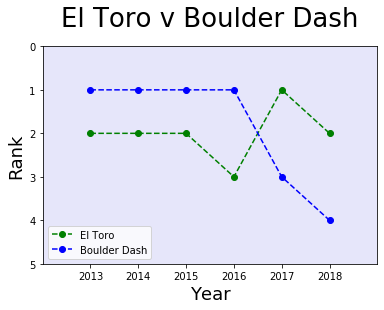

In [5]:
# write a function to plot rankings over time for 2 roller coasters here:

def compare_rankings(coaster_1, coaster_2, data_frame, park_1, park_2):
    rankings_1 = data_frame.loc[(data_frame['Name'] == coaster_1) & (data_frame['Park'] == park_1)]
    rankings_2 = data_frame.loc[(data_frame['Name'] == coaster_2) & (data_frame['Park'] == park_2)]
    ax = plt.subplot()
    ax.set_xticks(range(len(rankings_1)))
    ax.set_xticklabels(['2013', '2014', '2015', '2016', '2017', '2018'])
    ax.invert_yaxis()
    plt.axis([-1, 6, 5, 0])
    plt.xlabel("Year", fontsize = 18)
    plt.ylabel('Rank', fontsize = 18)
    ax.set_facecolor('lavender')
    plt.title(f"{coaster_1} v {coaster_2}", fontsize = 26, pad = 20)
    
    plt.plot(range(len(rankings_1)), rankings_1['Rank'], 'go--', label = coaster_1)
    plt.plot(range(len(rankings_2)), rankings_2['Rank'], 'go--', color = 'blue', label = coaster_2)
    ax.legend(loc = 'lower left')
    plt.show()
    
    
compare_rankings('El Toro', 'Boulder Dash', wood_rankings, 'Six Flags Great Adventure', 'Lake Compounce')
    

Write a function that will plot the ranking of the top n ranked roller coasters over time as lines. Your funciton should take a number n and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization. 

For example, if n == 5, your function should plot a line for each roller coaster that has a rank of 5 or lower. 

Call your function with a value for n and either the wood ranking or steel ranking DataFrame

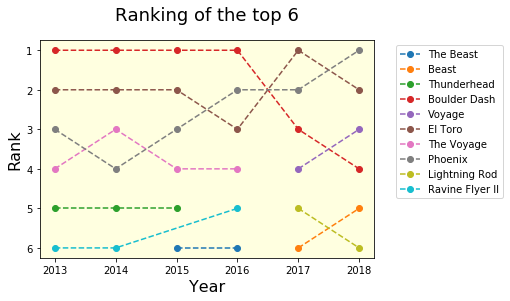

In [6]:
# Write funciton to plot top n rankings over time here: 

def top_rankings(n, data_frame):
    rankings = data_frame.loc[(data_frame['Rank'] <= n)]
    
    ax = plt.subplot()
    for coaster in set(rankings['Name']):
        coaster_rankings = rankings[rankings['Name'] == coaster]
        ax.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'], 'o--', label = coaster, )
    
    ax.invert_yaxis()
    ax.set_facecolor('lightyellow')


    plt.title(f"Ranking of the top {n}", fontsize = 18, pad = 20)
    plt.xlabel("Year", fontsize = 16)
    plt.ylabel("Rank", fontsize = 16)
    plt.legend(bbox_to_anchor=(1.05, 1))


    
    plt.show()   
    
top_rankings(6, wood_rankings)


Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. Captain Coaster is a popular roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in roller_coasters.csv. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data. 

In [7]:
# load roller coaster data here: 

roller_coasters = pd.read_csv('roller_coasters.csv')

print(roller_coasters.head())

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization. 

Call your function with the roller coaster DataFrame and one of the column names. 

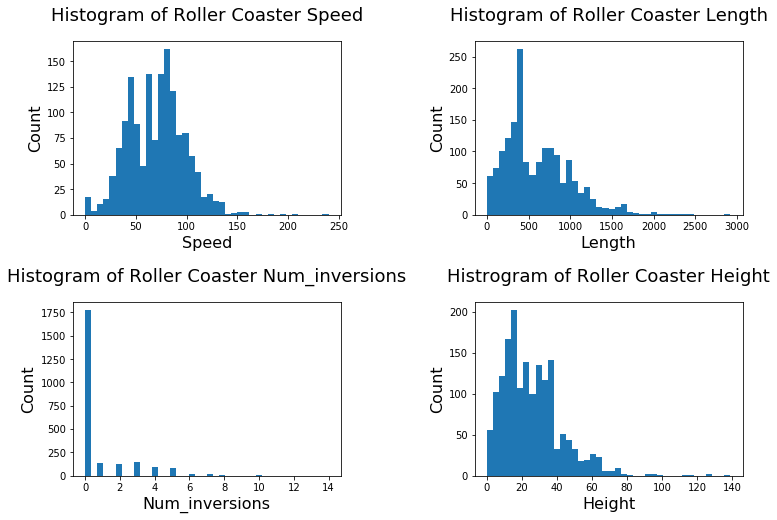

<Figure size 432x288 with 0 Axes>

In [8]:
# Write function to plot histogram of column values here: 

def column_values_histogram(dataframe, column_name):
    ax = plt.gca()
    plt.hist(dataframe[column_name].dropna(), bins = 40)
    plt.title("Histogram of Roller Coaster " + column_name[0].upper() + column_name[1:], fontsize = 18, pad = 20)
    plt.ylabel("Count", fontsize = 16)
    plt.xlabel(column_name[0].upper() + column_name[1:], fontsize = 16)
    
def height_histogram():
    heights = roller_coasters[roller_coasters['height'] <= 140]['height'].dropna()
    plt.hist(heights, bins = 40)
    plt.title('Histrogram of Roller Coaster Height', fontsize = 18, pad = 20)
    plt.ylabel("Count", fontsize = 16)
    plt.xlabel("Height", fontsize = 16)

plt.figure(figsize = (12, 8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(2, 2, 1)
column_values_histogram(roller_coasters, 'speed')
plt.subplot(2, 2, 2)
column_values_histogram(roller_coasters, 'length')
plt.subplot(2, 2, 3)
column_values_histogram(roller_coasters, 'num_inversions')
plt.subplot(2, 2, 4)
height_histogram()
plt.show()
plt.clf()

    
    

Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization. 

Call your function with the roller coaster DataFrame and an amusement park name

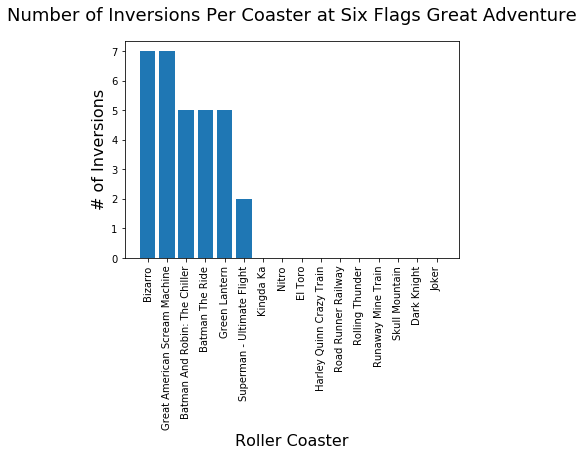

In [9]:
# write a function to plot inversions by coaster at a park here:

def num_inversions(data_frame, park):
    selected_park = data_frame[data_frame['park'] == park]
    selected_park = selected_park.sort_values('num_inversions', ascending = False)
    names = selected_park['name']
    num_inversions = selected_park['num_inversions']
    ax = plt.subplot()
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation = 90)
    plt.title(f'Number of Inversions Per Coaster at {park}', fontsize = 18, pad = 20)
    plt.xlabel('Roller Coaster', fontsize = 16)
    plt.ylabel('# of Inversions', fontsize = 16)
    plt.bar(range(len(num_inversions)), num_inversions)
    plt.show()
    
num_inversions(roller_coasters, 'Six Flags Great Adventure')

Write a function that creates a pie chart that compares the number of operating roller coasters ('status,operating') to the number of closed roller coasters ('status.closed.definitely'). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization. 

Call your function with the roller coaster Data Frame

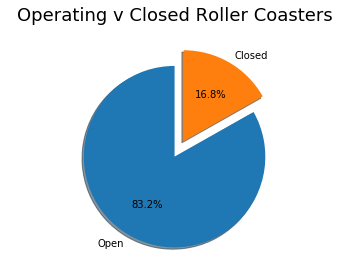

In [10]:
# write a function to plot pie chart of operating status here: 

def compare_pie(data_frame):
    operating = data_frame[data_frame['status'] == 'status.operating']
    closed = data_frame[data_frame['status'] == 'status.closed.definitely']
    amount_operating = len(operating)
    amount_closed = len(closed)
    labels = 'Open', 'Closed'
    data = [amount_operating, amount_closed]
    explode = (0.1, 0.1)
    plt.pie(data, explode = explode, labels = labels, autopct = '%0.1f%%', shadow = True, startangle = 90)
    plt.axis('equal')
    plt.title('Operating v Closed Roller Coasters', fontsize = 18, pad = 20)
    plt.show()
    
    

compare_pie(roller_coasters)
    

.scatter() is another useful function in matplotlib that you might not have seen before. .scatter() produces a scatter plot, which is similar to .plot() in that it plots points on a figure. .scatter(), however, does not connect the points with a line. This allows you to analyze the relationship between two variables. 

Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization. 

Call your function with the roller coaster DataFrame and two-column names. 

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


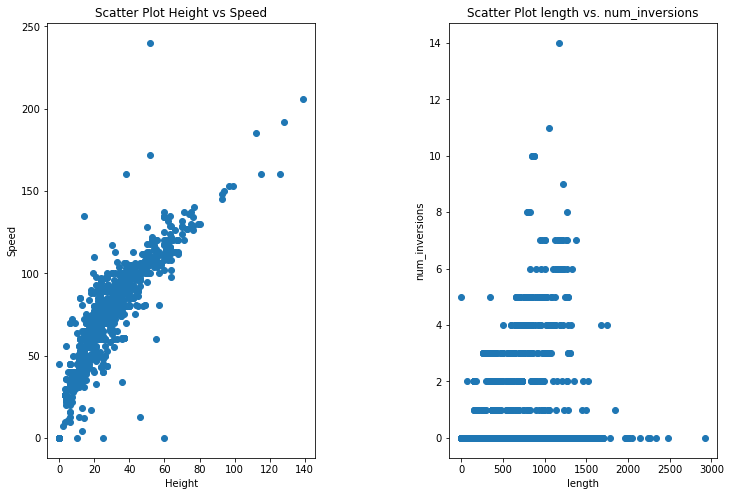

In [21]:
# write a function to create scatter plot of any two numeric colums here:

print(roller_coasters.head())
def scatter_plot(data_frame, column_1, column_2):
    plt.scatter(data_frame[column_1], data_frame[column_2])
    plt.title(f"Scatter Plot {column_1} vs. {column_2}")
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.show()
    
# function to plot scatter of height vs speed 
def scatter_height_speed(data_frame):
    data = data_frame[data_frame['height'] <= 140]
    plt.scatter(data['height'], data['speed'])
    plt.title("Scatter Plot Height vs Speed")
    plt.xlabel('Height')
    plt.ylabel('Speed')

plt.figure(figsize = (12, 8))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.subplot(1, 2, 1)
scatter_height_speed(roller_coasters)
plt.subplot(1, 2, 2)
scatter_plot(roller_coasters, 'length', 'num_inversions')   


